In [1]:
import numpy as np 
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklift.metrics import (uplift_at_k, uplift_auc_score, qini_auc_score, weighted_average_uplift)
from sklearn.model_selection import KFold

In [2]:
df_x5 = pd.read_csv('retail_hero_final_model_train_data.csv', index_col='client_id')
df_features, w, y = df_x5[['first_redeem_date', 'express_spent_mean',
       'express_points_spent_sum', 'regular_points_received_sum_last_m',
       'avg_spent_perday', 'after_redeem_sum_perday']], df_x5['treatment_flg'], df_x5['target']

def x5_coding(x):
    return int(str(int(x['treatment_flg']))+str(int(x['target'])), 2)

df_x5['coding'] = df_x5.apply(x5_coding, axis=1)
c = df_x5['coding']

from sklearn.model_selection import train_test_split
indices_learn, indices_valid = train_test_split(df_x5.index, test_size=0.3,random_state=0)
X_train, w_train, y_train, c_train = df_features.loc[indices_learn].fillna(0), w.loc[indices_learn], y.loc[indices_learn], c.loc[indices_learn]
X_valid, w_valid, y_valid, c_valid = df_features.loc[indices_valid].fillna(0), w.loc[indices_valid], y.loc[indices_valid], c.loc[indices_valid]

In [64]:
param = {'max_depth': 8, 'n_rand_features': 5, 'norm': False, 'random_state': 0, 'scoring': 'Chi'}

In [65]:
from tree_uplift import UpliftTree, RandomForestUplift
ut = UpliftTree(**param)

In [66]:
ut.fit(X=X_train.values, w=w_train.values, y=y_train.values)
class_, _ = ut.predict(X_valid.values)

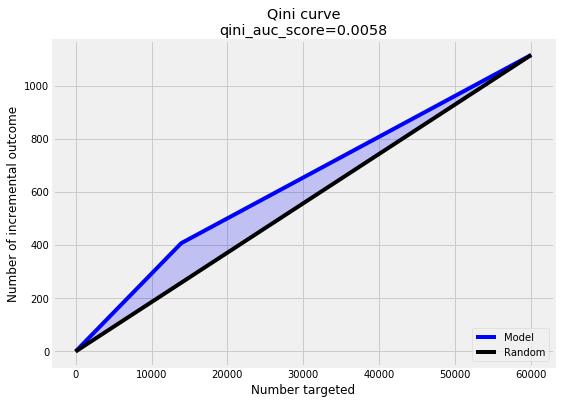

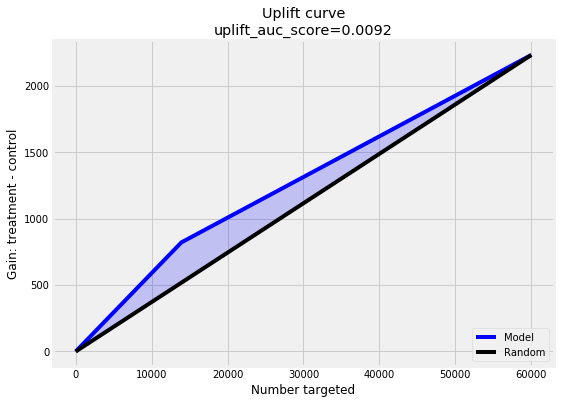

In [67]:
from sklift.viz import plot_qini_curve
from sklift.viz import plot_uplift_curve
%matplotlib inline
plot_qini_curve(y_true=y_valid, uplift=np.array(class_).astype(int), treatment=w_valid, perfect=False)
plot_uplift_curve(y_true=y_valid, uplift=np.array(class_).astype(int), treatment=w_valid, perfect=False)